<a href="https://colab.research.google.com/github/Ajay0110/Mobile-Price-Range-Prediction/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

# Importing libraries

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import warnings; warnings.simplefilter('ignore')

# Connecting Google Drive

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset path, shape, head and tail

In [3]:
# Setting up path
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA/Unsupervised EDA Capstone Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

In [4]:
df.shape # To check the shape

(7787, 12)

In [5]:
df.head() # To get the first 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.tail() # To get the last 5 rows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [7]:
#checking null values
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

Inorder to integrate the dataset with IMDB, the datasets were downloaded from https://datasets.imdbws.com/
.It contains the following datasets:
*   title.akas.tsv.gz
*   title.basics.tsv.gz
*   title.crew.tsv.gz
*   title.episode.tsv.gz
*   title.principals.tsv.gz
*   title.ratings.tsv.gz
*   name.basics.tsv.gz

The integration used basics, crew and ratings. For more info visit 
https://www.imdb.com/interfaces/

Since the imdb datasets are large, the integration is done separately. The resultant dataframe is written in a new colab file.









### Getting the integrated dataset

In [8]:
# Path of the integrated dataset
df1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/EDA/Unsupervised EDA Capstone Project/netflix_updated.csv")

In [9]:
# Getting the first 5 rows of integrated dataset
df1.head()

,title,show_id,type,title.1,director,cast,country,date_added,release_year,rating,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,#alive,s28,Movie,#alive,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",2020,TV-MA,...,movie,#alive,#saraitda,0,2020.0,\N,98,"Action,Drama,Horror",6.3,38636.0
1,#annefrank - parallel stories,s29,Movie,#annefrank - parallel stories,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,"July 1, 2020",2019,TV-14,...,0,0,0,0,0.0,0,0,0,0.0,0.0
2,#blackaf,s30,TV Show,#blackaf,0,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,"April 17, 2020",2020,TV-MA,...,tvSeries,#blackaf,#blackaf,0,2020.0,2020,36,Comedy,6.6,4848.0
3,#cats_the_mewvie,s31,Movie,#cats_the_mewvie,Michael Margolis,0,Canada,"February 5, 2020",2020,TV-14,...,movie,#cats_the_mewvie,#cats_the_mewvie,0,2020.0,\N,90,Documentary,5.3,468.0
4,#friendbutmarried,s32,Movie,#friendbutmarried,Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,"May 21, 2020",2018,TV-G,...,0,0,0,0,0.0,0,0,0,0.0,0.0


In [10]:
# Getting the last 5 rows of integrated dataset
df1.tail()

,title,show_id,type,title.1,director,cast,country,date_added,release_year,rating,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
7781,忍者ハットリくん,s557,TV Show,忍者ハットリくん,0,0,Japan,"December 23, 2018",2012,TV-Y7,...,0,0,0,0,0.0,0,0,0,0.0,0.0
7782,海的儿子,s2083,TV Show,海的儿子,0,"Li Nanxing, Christopher Lee, Jesseca Liu, Appl...",0,"April 27, 2018",2016,TV-14,...,0,0,0,0,0.0,0,0,0,0.0,0.0
7783,마녀사냥,s3072,TV Show,마녀사냥,0,"Si-kyung Sung, Se-yoon Yoo, Dong-yup Shin, Ji-...",South Korea,"February 19, 2018",2015,TV-MA,...,0,0,0,0,0.0,0,0,0,0.0,0.0
7784,반드시 잡는다,s2930,Movie,반드시 잡는다,Hong-seon Kim,Baek Yoon-sik,South Korea,"February 28, 2018",2017,TV-MA,...,0,0,0,0,0.0,0,0,0,0.0,0.0
7785,최강전사 미니특공대 : 영웅의 탄생,s3090,Movie,최강전사 미니특공대 : 영웅의 탄생,Young Jun Lee,"Um Sang-hyun, Yang Jeong-hwa, Jeon Tae-yeol, S...",0,"September 1, 2018",2018,TV-Y7,...,0,0,0,0,0.0,0,0,0,0.0,0.0


In [11]:
# Getting the shape of the dataset
df1.shape

(7786, 24)

In [12]:
# Getting list of columns
cols = list(df1.columns)
# Replacing 0s with NaN
df1[cols] = df1[cols].replace({'0':np.nan, 0:np.nan})

In [13]:
# Removing repeated and unwanted columns
final_df = df1.drop(['isAdult','tconst','titleType','primaryTitle','originalTitle','title.1'], axis=1)

In [14]:
final_df.head()

,title,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,#alive,s28,Movie,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",2020.0,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",2020.0,\N,98,"Action,Drama,Horror",6.3,38636.0
1,#annefrank - parallel stories,s29,Movie,"Sabina Fedeli, Anna Migotto","Helen Mirren, Gengher Gatti",Italy,"July 1, 2020",2019.0,TV-14,95 min,"Documentaries, International Movies","Through her diary, Anne Frank's story is retol...",NaN,NaN,NaN,NaN,NaN,NaN
2,#blackaf,s30,TV Show,NaN,"Kenya Barris, Rashida Jones, Iman Benson, Genn...",United States,"April 17, 2020",2020.0,TV-MA,1 Season,TV Comedies,Kenya Barris and his family navigate relations...,2020.0,2020,36,Comedy,6.6,4848.0
3,#cats_the_mewvie,s31,Movie,Michael Margolis,NaN,Canada,"February 5, 2020",2020.0,TV-14,90 min,"Documentaries, International Movies",This pawesome documentary explores how our fel...,2020.0,\N,90,Documentary,5.3,468.0
4,#friendbutmarried,s32,Movie,Rako Prijanto,"Adipati Dolken, Vanesha Prescilla, Rendi Jhon,...",Indonesia,"May 21, 2020",2018.0,TV-G,102 min,"Dramas, International Movies, Romantic Movies","Pining for his high school crush for years, a ...",NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Checking for null values
final_df.isnull().sum()

title                0
show_id              0
type                 0
director          2389
cast               718
country            507
date_added          10
release_year         0
rating               7
duration             0
listed_in            0
description          0
startYear         2341
endYear           2341
runtimeMinutes    2341
genres            2341
averageRating     2341
numVotes          2341
dtype: int64

### The imdb ratings is integrated with the dataset. There are null values in the dataset as you can see above. We will treat it as data not available and all these data will be dropped after EDA.

### We can treat the missing values by getting the data from other imdb datasets, but after processing those datasets the resulting dataframe is around 5GB and when we load our actual dataset to merge, it causes Memory Error.

# Exploratory Data Analysis

### Number of movies and TV shows visualization

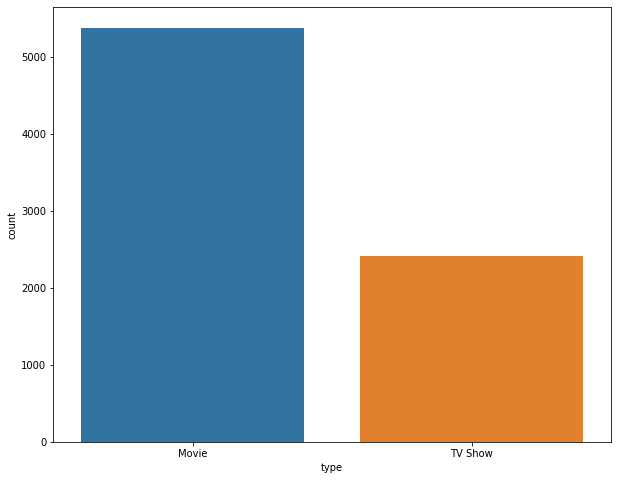

In [16]:
# Countplot for feature type
plt.figure(figsize = (10,8))
sns.countplot(final_df['type'])

([<matplotlib.patches.Wedge at 0x7f00c43cfc10>,
 [Text(1.087298566700026, -0.16667881344690905, 'Movie'),
  Text(-1.0872985823056178, 0.16667871164666975, 'TV Show')],
 [Text(0.5930719454727413, -0.09091571642558675, '69.0%'),
  Text(-0.5930719539848824, 0.0909156608981835, '31.0%')])

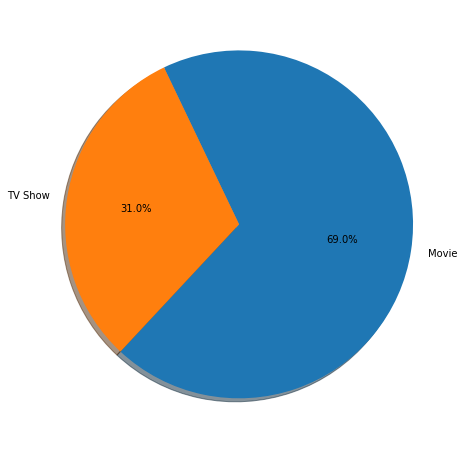

In [17]:
# Pie chart visualisation
plt.figure(figsize = (10,8))
plt.pie(final_df['type'].value_counts().values, labels=final_df['type'].value_counts().index, shadow = True, startangle=227, autopct='%1.1f%%')

The number of movies is high whereas TV shows is significantly low

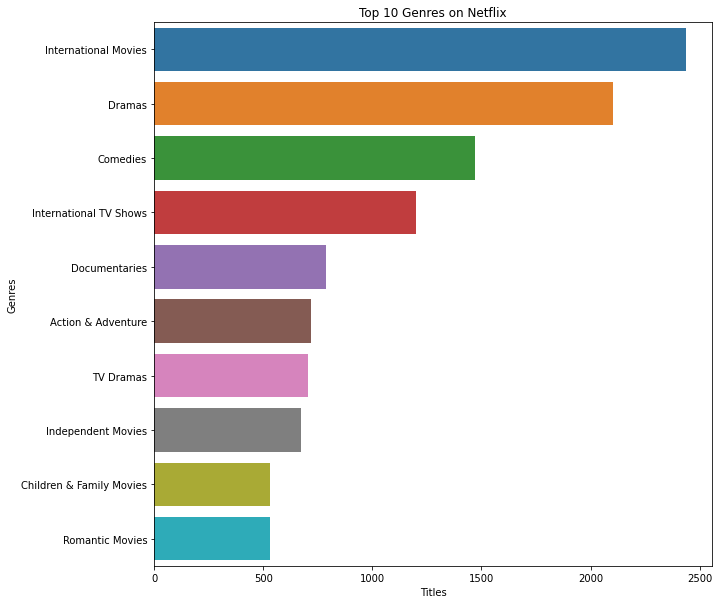

In [18]:
# Top Ten Genres
genres = final_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
plt.figure(figsize=(10,10))
g = sns.countplot(y = genres, order=genres.value_counts().index[:10])
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

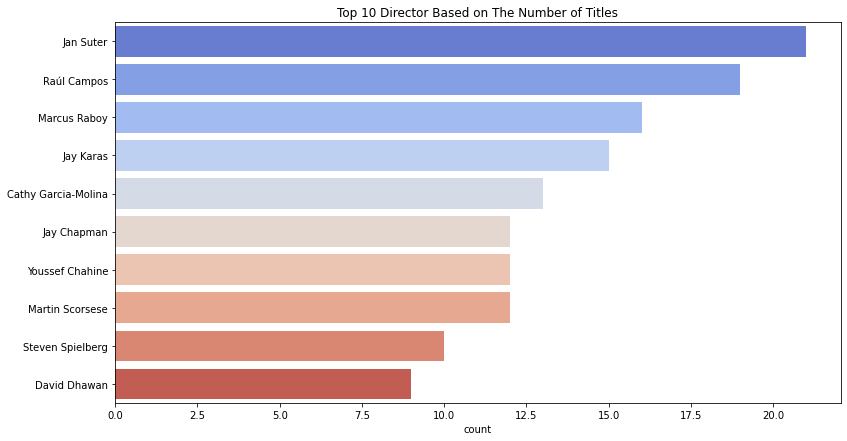

In [19]:
# Top 10 Directors based on number of titles
directors = final_df[final_df.director != 'No Director'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Director Based on The Number of Titles')
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='coolwarm')
plt.show()

### Top 10 Countries using Netflix

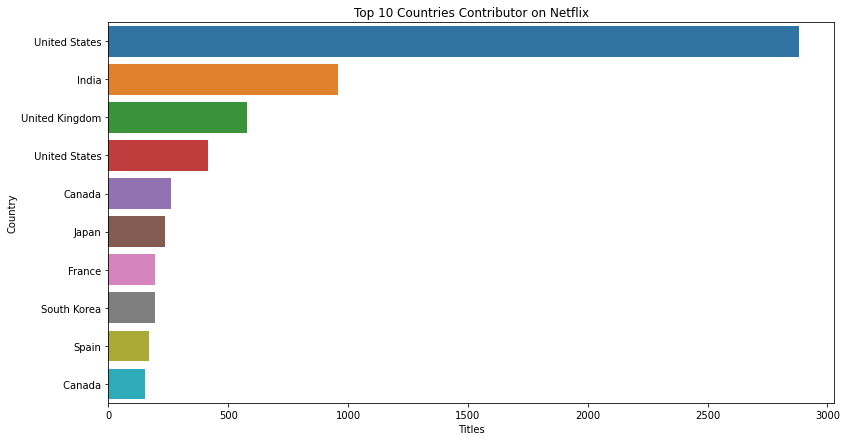

In [20]:
# Top 10 Countries that contribute to Netflix
countries = final_df.set_index('title').country.str.split(',', expand=True).stack().reset_index(level=1, drop=True);
countries = countries[countries != 'Country Unavailable']
plt.figure(figsize=(13,7))
sns.countplot(y = countries, order=countries.value_counts().index[:10])
plt.title('Top 10 Countries Contributor on Netflix')
plt.xlabel('Titles')
plt.ylabel('Country')
plt.show()

United States has the highest usage.

Even though India and UK are in the top 3 still the usage is significantly less when compared to United States.



In [21]:
# Creating movie and tv show dataframes
movie_df = final_df[final_df['type'] == 'Movie']
tvshow_df = final_df[final_df['type'] == 'TV Show']

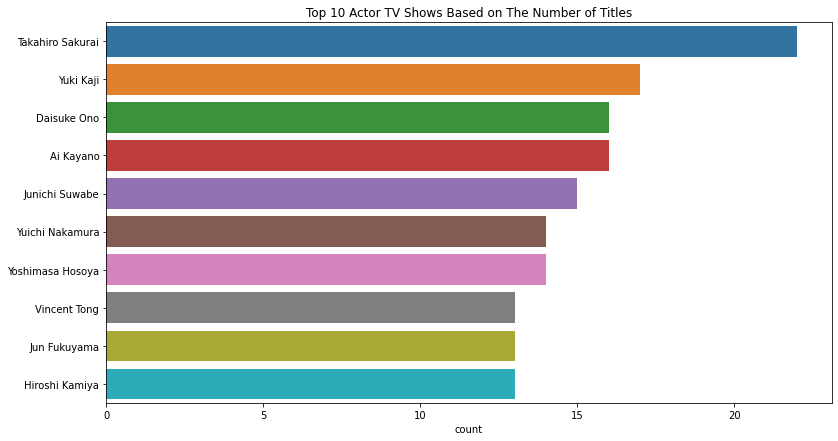

In [22]:
# Plot for Top 10 Actor TV Shows Based on The Number of Title
cast_shows = tvshow_df[tvshow_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor TV Shows Based on The Number of Titles')
sns.countplot(y = cast_shows, order=cast_shows.value_counts().index[:10])
plt.show()

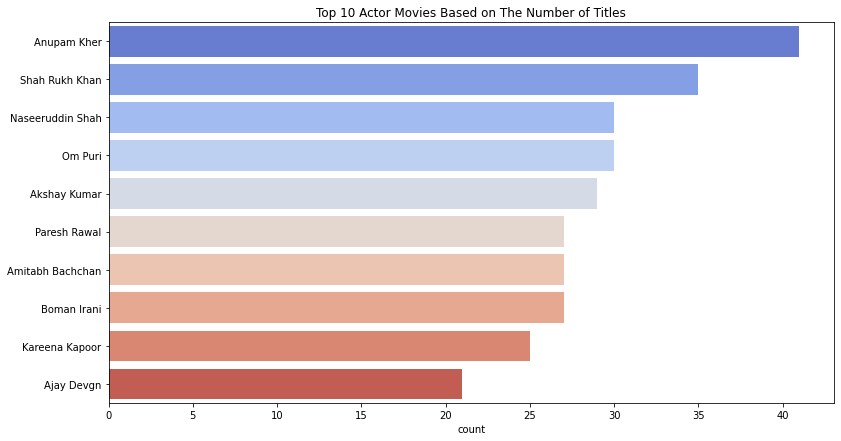

In [23]:
# Plot for Top 10 Actor Movies Based on The Number of Titles
cast_movie = movie_df[movie_df.cast != 'No Cast'].set_index('title').cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(13,7))
plt.title('Top 10 Actor Movies Based on The Number of Titles')
sns.countplot(y = cast_movie, order=cast_movie.value_counts().index[:10], palette='coolwarm')
plt.show()

Here are the top 10 movies that are being featured in Netflix.

In [24]:
# Getting sorted dataframe based on number of votes
top_titles = movie_df.sort_values(by='numVotes', ascending=False).head(10)

In [25]:
# Top 10 movies with max number of votes
top_titles[['title','numVotes']][:10]

,title,numVotes
2960,inception,2303614.0
4983,pulp fiction,2010589.0
6629,the matrix,1881135.0
6597,the lord of the rings: the return of the king,1801296.0
6598,the lord of the rings: the two towers,1626552.0
1766,django unchained,1519255.0
2978,inglourious basterds,1416946.0
5410,schindler's list,1333180.0
6269,the departed,1303277.0
439,american beauty,1141123.0


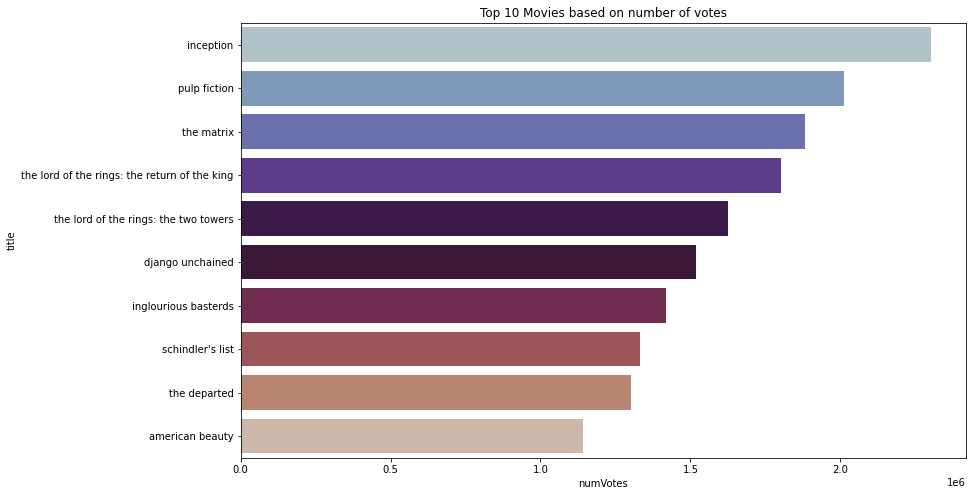

In [26]:
  # Bar plot for Top 10 Movies based on number of votes
  plt.figure(figsize = (13, 8))
  plt.title("Top 10 Movies based on number of votes")
  sns.barplot(top_titles['numVotes'],top_titles['title'], palette = 'twilight')

In [27]:
# Getting sorted dataframe based on number of votes
top_titles = tvshow_df.sort_values(by='numVotes', ascending=False).head(10)

In [28]:
# Top 10 movies with max number of votes
top_titles[['title','numVotes']][:10]

,title,numVotes
6987,the witcher,474745.0
6777,the queen's gambit,424638.0
599,attack on titan,357682.0
6421,the haunting of hill house,233873.0
7261,twin peaks,194962.0
3763,"love, death & robots",161661.0
4856,planet earth ii,141162.0
1084,bridgerton,130805.0
7565,when they see us,117857.0
6535,the last dance,117362.0


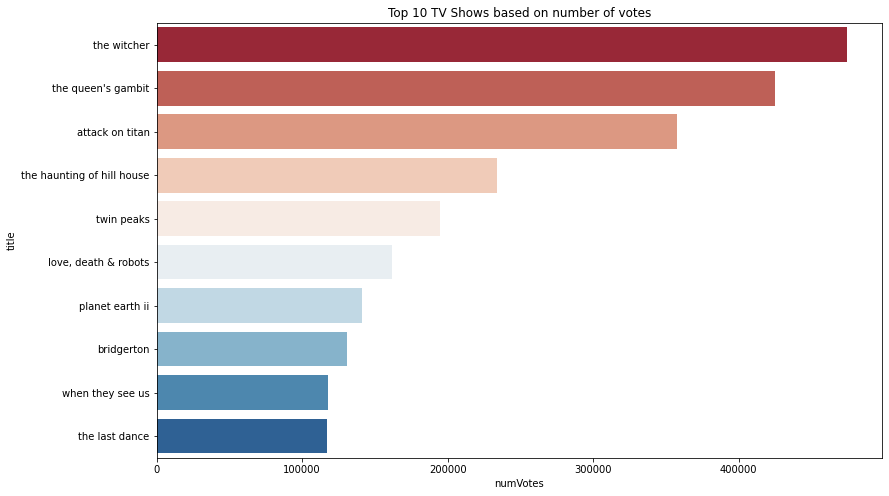

In [29]:
  # Bar plot for Top 10 Movies based on number of votes
  plt.figure(figsize = (13, 8))
  plt.title("Top 10 TV Shows based on number of votes")
  sns.barplot(top_titles['numVotes'],top_titles['title'], palette = 'RdBu')

In [41]:
# Plot for Top 10 movie directors with highest rating
top_rated_movies = movie_df[movie_df['averageRating'] > 8.5].sort_values(by='averageRating',ascending=False)
top_rated_movies

,title,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
4345,my way,s4366,Movie,Antongiulio Panizzi,"Silvio Berlusconi, Alan Friedman",Italy,"November 8, 2016",2016.0,TV-14,101 min,"Documentaries, International Movies",Former Italian prime minister Silvio Berluscon...,2016.0,\N,59,"Comedy,Romance",9.2,6.0
6030,the 12th man,s6050,Movie,Harald Zwart,"Thomas Gullestad, Jonathan Rhys Meyers, Marie ...",Norway,"October 31, 2020",2018.0,TV-MA,130 min,"Action & Adventure, Dramas, International Movies","Based on true events, this story follows a Nor...",2018.0,\N,35,"Comedy,Drama,Family",9.1,403.0
4470,no longer kids,s4491,Movie,Samir Al Asfory,"Said Saleh, Hassan Moustafa, Ahmed Zaki, Youne...",Egypt,"May 21, 2020",1979.0,TV-14,237 min,"Comedies, Dramas, International Movies",Hoping to prevent their father from skipping t...,1979.0,\N,236,Comedy,9.0,1037.0
3427,krish trish and baltiboy: face your fears,s3449,Movie,Tilak Shetty,"Tarun Ratnani, Smita Malhotra, Deepak Chachra",India,"November 17, 2017",2017.0,TV-Y7,65 min,Children & Family Movies,"In three tales about fear, a baby elephant get...",2017.0,\N,65,Animation,9.0,94.0
6597,the lord of the rings: the return of the king,s6617,Movie,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","New Zealand, United States","January 1, 2020",2003.0,PG-13,201 min,"Action & Adventure, Sci-Fi & Fantasy",Aragorn is revealed as the heir to the ancient...,2003.0,\N,201,"Action,Adventure,Drama",9.0,1801296.0
5410,schindler's list,s5431,Movie,Steven Spielberg,"Liam Neeson, Ben Kingsley, Ralph Fiennes, Caro...",United States,"April 1, 2018",1993.0,R,195 min,"Classic Movies, Dramas",Oskar Schindler becomes an unlikely humanitari...,1993.0,\N,195,"Biography,Drama,History",9.0,1333180.0
3578,lens,s3600,Movie,Jayaprakash Radhakrishnan,"Jayaprakash Radhakrishnan, Anand Sami, Aswathy...",India,"June 1, 2017",2015.0,TV-MA,109 min,"Dramas, Independent Movies, International Movies","Addicted to webcams and voyeurism, a married m...",2015.0,\N,57,"Drama,Fantasy,Mystery",9.0,4442.0
7742,zero hour,s7766,Movie,Robert O. Peters,"Richard Mofe-Damijo, Alex Ekubo, Ali Nuhu, Rah...",NaN,"December 13, 2019",2018.0,TV-MA,89 min,"International Movies, Thrillers","After his father passes, the heir to a retail ...",2018.0,\N,24,"Action,Animation,Comedy",9.0,27.0
3842,mahabharat,s3863,Movie,Amaan Khan,"Amitabh Bachchan, Ajay Devgn, Vidya Balan, Sha...",India,"August 1, 2018",2013.0,TV-14,119 min,"Action & Adventure, Dramas, International Movies",Two young brothers encounter a singing bird wh...,2013.0,2014,20,"Drama,History,War",8.9,8835.0
1612,david attenborough: a life on our planet,s1634,Movie,"Alastair Fothergill, Jonnie Hughes, Keith Scholey",David Attenborough,"United States, United Kingdom","October 4, 2020",2020.0,PG,84 min,Documentaries,"A broadcaster recounts his life, and the evolu...",2020.0,\N,83,"Biography,Documentary",8.9,31811.0


In [31]:
top_rated_movies.shape

(24, 18)

In [40]:
# Top 10 movies with max number of votes
top_movies = top_rated_movies[['title','averageRating']][:10]
top_movies

,title,averageRating
4345,my way,9.2
6030,the 12th man,9.1
4470,no longer kids,9.0
3427,krish trish and baltiboy: face your fears,9.0
6597,the lord of the rings: the return of the king,9.0
5410,schindler's list,9.0
3578,lens,9.0
7742,zero hour,9.0
3842,mahabharat,8.9
1612,david attenborough: a life on our planet,8.9


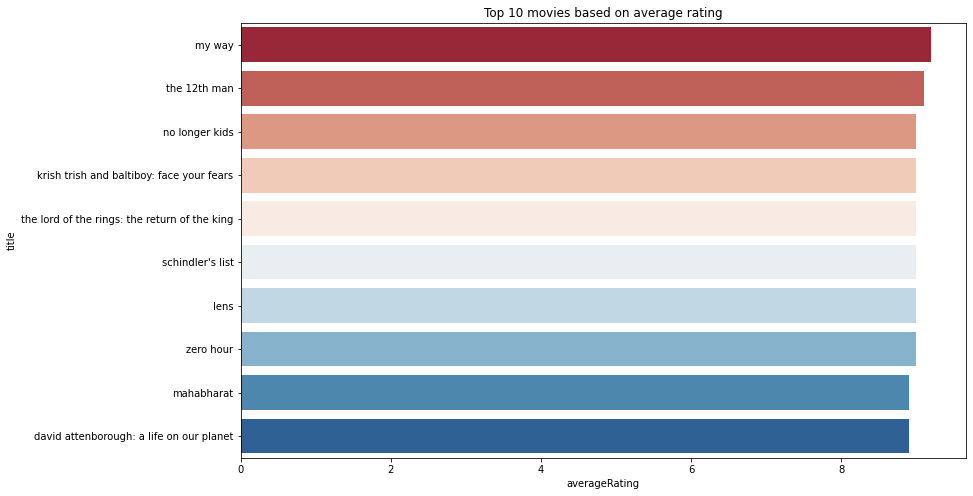

In [33]:
# Bar plot for Top 10 Movies based on average rating
plt.figure(figsize = (13, 8))
plt.title("Top 10 movies based on average rating")
sns.barplot(top_movies['averageRating'],top_movies['title'], palette = 'RdBu')

In [34]:
top_directors = top_rated_movies[['averageRating','director']][:10]
top_directors

,averageRating,director
4345,9.2,Antongiulio Panizzi
6030,9.1,Harald Zwart
4470,9.0,Samir Al Asfory
3427,9.0,Tilak Shetty
6597,9.0,Peter Jackson
5410,9.0,Steven Spielberg
3578,9.0,Jayaprakash Radhakrishnan
7742,9.0,Robert O. Peters
3842,8.9,Amaan Khan
1612,8.9,"Alastair Fothergill, Jonnie Hughes, Keith Scholey"


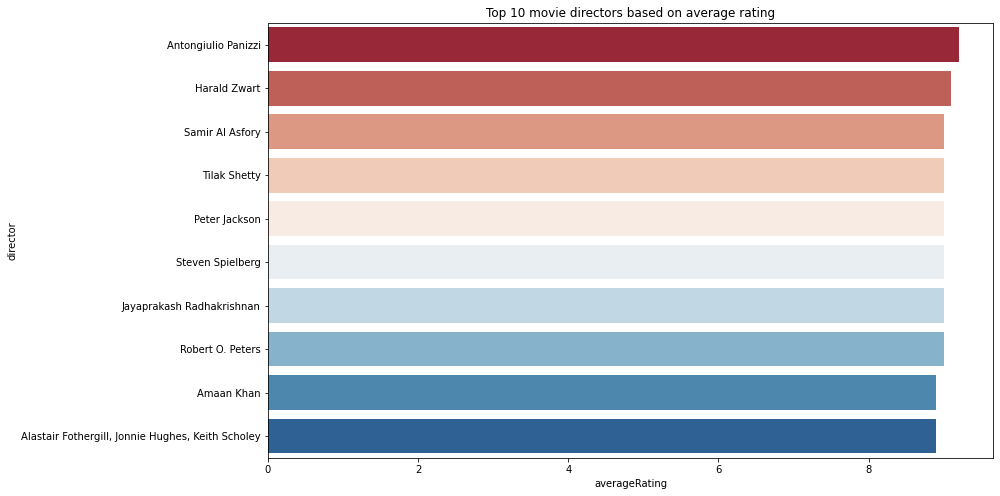

In [35]:
# Bar plot for Top 10 Movies based on average rating
plt.figure(figsize = (13, 8))
plt.title("Top 10 movie directors based on average rating")
sns.barplot(top_directors['averageRating'],top_directors['director'], palette = 'RdBu')

In [36]:
# Plot for Top 10 movie directors with highest rating
top_rated_shows = tvshow_df[tvshow_df['averageRating'] > 8.5].sort_values(by='averageRating',ascending=False)

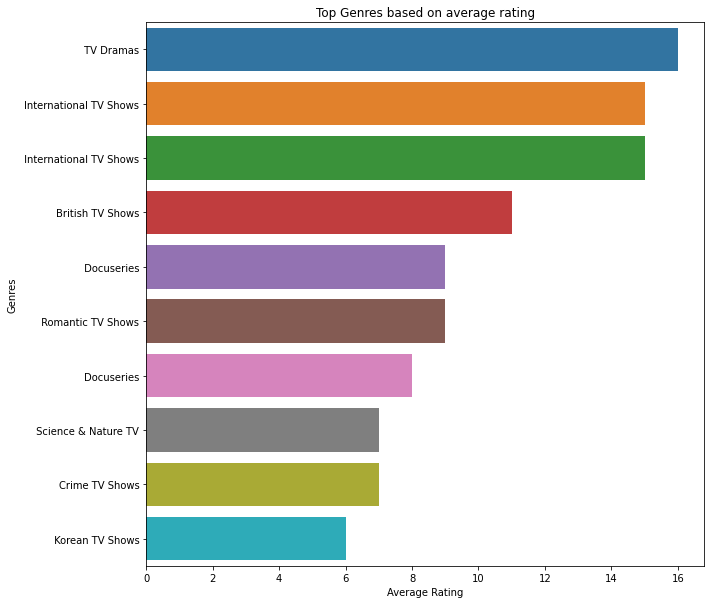

In [37]:
# Top genres based on Average Rating
top_rated_genres = top_rated_shows.set_index('averageRating').listed_in.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(10,10))
sns.countplot(y = top_rated_genres, order=top_rated_genres.value_counts().index[:10])
plt.title('Top Genres based on average rating')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.show()

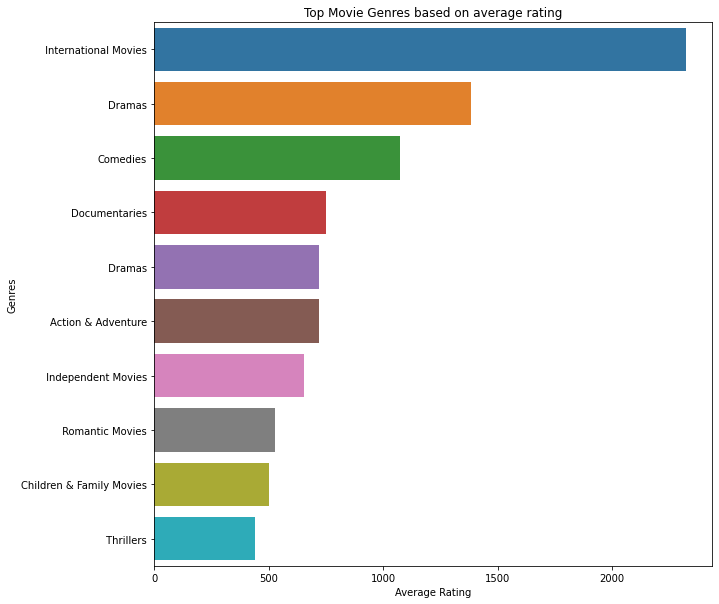

In [49]:
top_genres = movie_df.set_index('averageRating').listed_in.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
# Bar plot for Top 10 Movies based on average rating
plt.figure(figsize=(10,10))
sns.countplot(y = top_genres, order=top_genres.value_counts().index[:10])
plt.title('Top Movie Genres based on average rating')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.show()

In [44]:
# Top 10 movies with max number of votes
top_shows = top_rated_shows[['title','averageRating']][:10]
top_shows

,title,averageRating
4856,planet earth ii,9.5
593,atelier,9.3
984,blue planet ii,9.3
6920,the trial,9.3
4677,our planet,9.3
5142,reply 1988,9.2
6454,the hunt,9.2
4317,my mister,9.1
6535,the last dance,9.1
6939,the umbrella academy,9.0


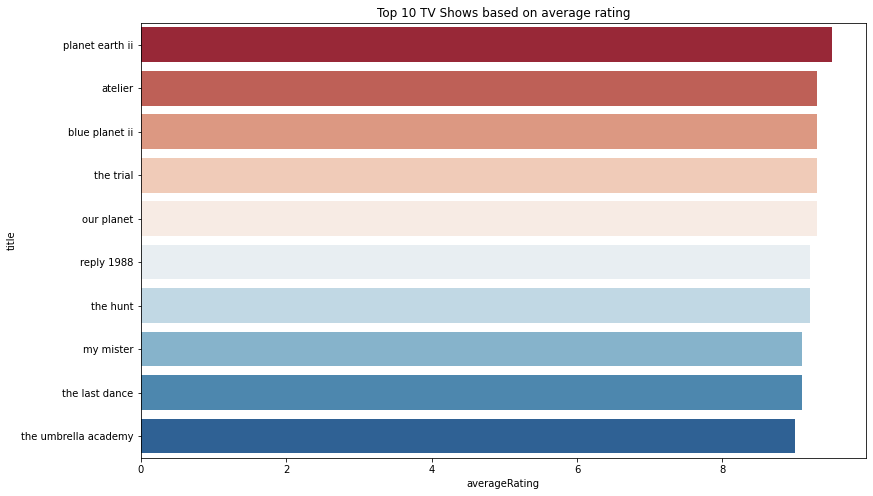

In [45]:
# Bar plot for Top 10 Movies based on average rating
plt.figure(figsize = (13, 8))
plt.title("Top 10 TV Shows based on average rating")
sns.barplot(top_shows['averageRating'],top_shows['title'], palette = 'RdBu')

In [46]:
top_directors = top_rated_shows[['averageRating','director']].dropna()
top_directors

,averageRating,director
6920,9.3,Stefano Lodovichi
2282,9.0,Alastair Fothergill
5807,8.7,Anurag Basu
180,8.7,"Steven Bognar, Julia Reichert"
1608,8.7,Stan Lathan
4238,8.7,Lee Eung-bok
4055,8.6,Ryan Polito
1606,8.6,Vanessa Roth


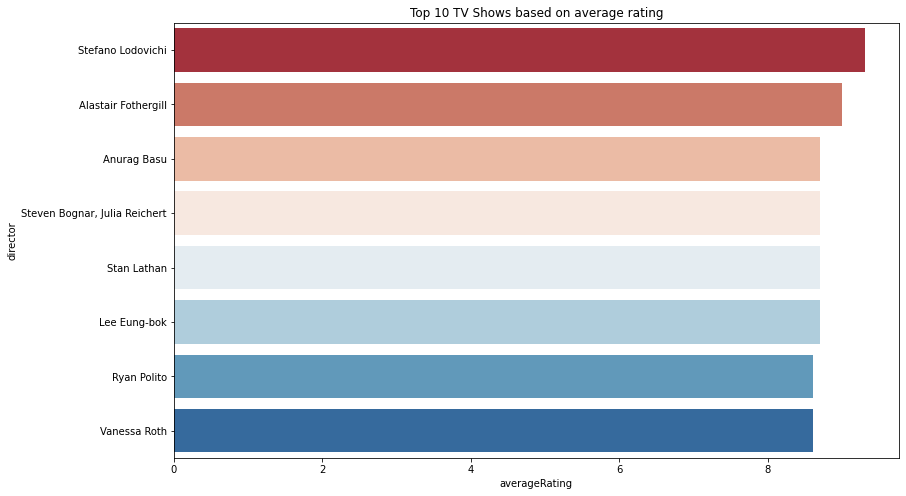

In [47]:
# Bar plot for Top 10 Movies based on average rating
plt.figure(figsize = (13, 8))
plt.title("Top 10 TV Shows based on average rating")
sns.barplot(top_directors['averageRating'],top_directors['director'], palette = 'RdBu')

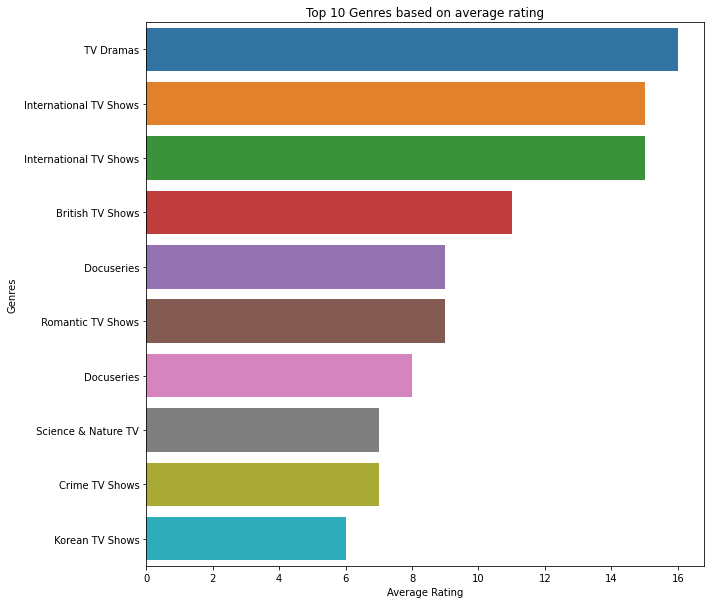

In [48]:
# Top genres based on Average Rating
top_rated_genres = top_rated_shows.set_index('averageRating').listed_in.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
plt.figure(figsize=(10,10))
sns.countplot(y = top_rated_genres, order=top_rated_genres.value_counts().index[:10])
plt.title('Top 10 Genres based on average rating')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.show()

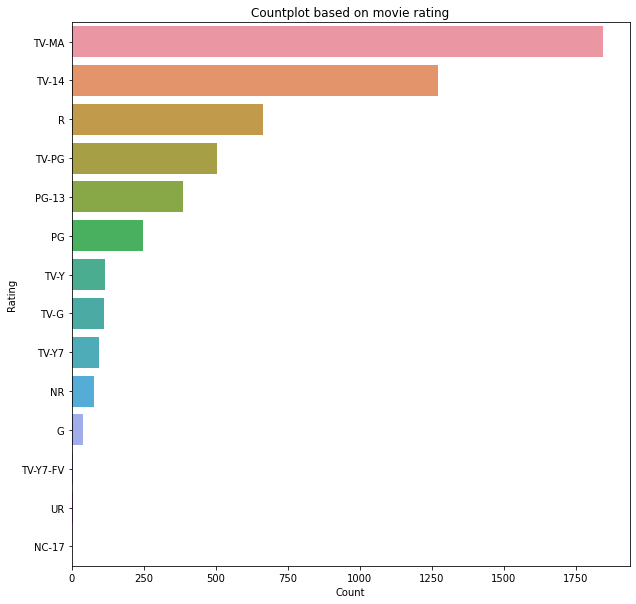

In [50]:
# Countplot based on rating
plt.figure(figsize=(10,10))
sns.countplot(y = movie_df.rating, order=movie_df.rating.value_counts().index)
plt.title('Countplot based on movie rating')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

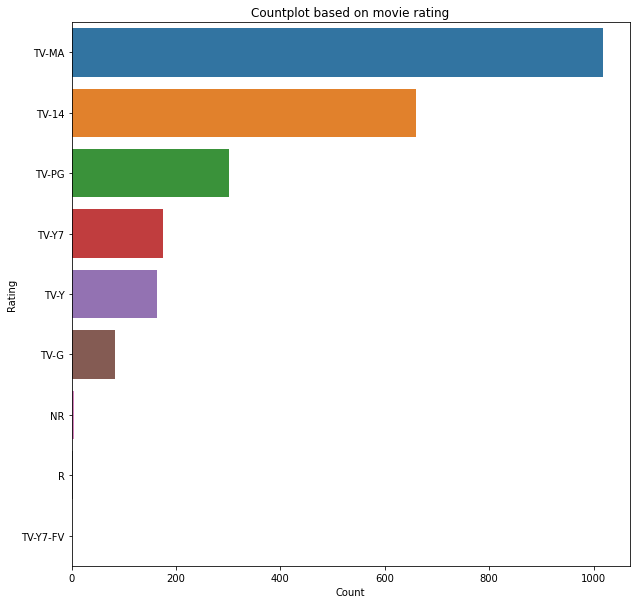

In [51]:
# Countplot based on TV shows rating
plt.figure(figsize=(10,10))
sns.countplot(y = tvshow_df.rating, order=tvshow_df.rating.value_counts().index)
plt.title('Countplot based on movie rating')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()

In [52]:
top_movie_rating = top_rated_movies[['rating','averageRating']]
top_tv_rating = top_rated_shows[['rating','averageRating']]

In [53]:
top_ratings = top_movie_rating[['averageRating','rating']]
top_ratings

,averageRating,rating
4345,9.2,TV-14
6030,9.1,TV-MA
4470,9.0,TV-14
3427,9.0,TV-Y7
6597,9.0,PG-13
5410,9.0,R
3578,9.0,TV-MA
7742,9.0,TV-MA
3842,8.9,TV-14
1612,8.9,PG


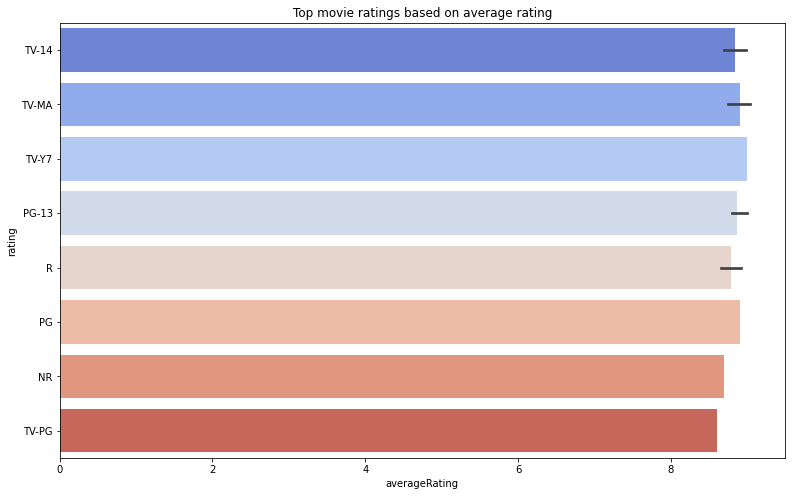

In [54]:
# Plot based on movie rating and average rating
plt.figure(figsize = (13, 8))
plt.title("Top movie ratings based on average rating")
sns.barplot(top_ratings['averageRating'],top_ratings['rating'], palette = 'coolwarm')

In [55]:
top_ratings = top_tv_rating[['averageRating','rating']]
top_ratings

,averageRating,rating
4856,9.5,TV-G
593,9.3,TV-PG
984,9.3,TV-G
6920,9.3,TV-MA
4677,9.3,TV-PG
5142,9.2,TV-14
6454,9.2,TV-PG
4317,9.1,TV-MA
6535,9.1,TV-MA
6939,9.0,TV-14


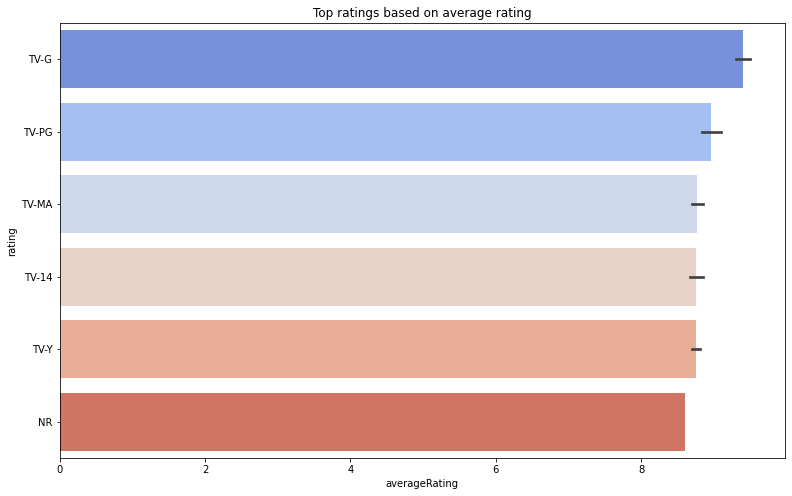

In [56]:
# Countplot based on TV shows rating
plt.figure(figsize = (13, 8))
plt.title("Top ratings based on average rating")
sns.barplot(top_ratings['averageRating'],top_ratings['rating'], palette = 'coolwarm')

# Understanding what type content is available in different countries

1.   TV-MA - Mature Audience Only
1.   TV-14 - Parents Strongly Cautioned
1.   TV-G - General Audience
1.   TV-PG - Parental Guidance Suggested
2.   NR - Not Rated
2.   PG-13 - Parents Strongly Cautioned
2.   TV-Y - All Children
2.   R - Restricted
1.   PG - Parental Guidance Suggested
1.   G - Appropriate for people of all ages
2.   TV-Y7 -  Directed to Older Children 
2.   NC-17 - No children 17 and under
1.   TV-Y7-FV - Directed to Older Children - Fantasy Violence










In [97]:
import plotly.express as px
movie_content = movie_df[["title", "rating"]]
movie_content = movie_content.groupby('rating')["title"].count().reset_index().sort_values('title', ascending = False)
movie_content = movie_content.rename(columns = {"title": "movies_count"})
px.bar(movie_content, x='rating', y='movies_count', color_discrete_sequence=px.colors.sequential.RdBu,
       title='For which category the maximum content(Movies) are uploaded? ')

In [98]:
import plotly.express as px
show_content = tvshow_df[["title", "rating"]]
show_content = show_content.groupby('rating')["title"].count().reset_index().sort_values('title', ascending = False)
show_content = show_content.rename(columns = {"title": "movies_count"})
px.bar(show_content, x='rating', y='movies_count', color_discrete_sequence=px.colors.sequential.RdBu,
       title='For which category the maximum content(TV Shows) are uploaded? ')

In [113]:
country_content_movie = movie_df[['country','rating']]
country_content_movie['Ratings'] = movie_df['rating']
country_content_movie = country_content_movie.groupby(['country','rating'])['Ratings'].count().reset_index().sort_values('Ratings', ascending = False)
country_content_movie.head()

,country,rating,Ratings
735,United States,TV-MA,583
301,India,TV-14,497
732,United States,R,364
731,United States,PG-13,227
303,India,TV-MA,201


### Displaying the type of content available in the top 3 countries

In [116]:
us_df = country_content_movie[country_content_movie['country'] == 'United States']
px.bar(us_df, x='rating', y='Ratings', color_discrete_sequence=px.colors.sequential.RdBu,
       title='United States Content ')

In [117]:
india_df = country_content_movie[country_content_movie['country'] == 'India']
px.bar(us_df, x='rating', y='Ratings', color_discrete_sequence=px.colors.sequential.RdBu,
       title='India Content ')

In [119]:
uk_df = country_content_movie[country_content_movie['country'] == 'United Kingdom']
px.bar(uk_df, x='rating', y='Ratings', color_discrete_sequence=px.colors.sequential.RdBu,
       title='United Kingdom Content')

In [121]:
country_content_show = tvshow_df[['country','rating']]
country_content_show['Ratings'] = tvshow_df['rating']
country_content_show = country_content_show.groupby(['country','rating'])['Ratings'].count().reset_index().sort_values('Ratings', ascending = False)
country_content_show.head()

,country,rating,Ratings
264,United States,TV-MA,297
262,United States,TV-14,178
265,United States,TV-PG,98
235,United Kingdom,TV-MA,87
195,South Korea,TV-14,69


In [122]:
us_df = country_content_show[country_content_show['country'] == 'United States']
px.bar(uk_df, x='rating', y='Ratings', color_discrete_sequence=px.colors.sequential.RdBu,
       title='United States Content')

In [123]:
india_df = country_content_show[country_content_show['country'] == 'India']
px.bar(us_df, x='rating', y='Ratings', color_discrete_sequence=px.colors.sequential.RdBu,
       title='India Content ')

In [124]:
uk_df = country_content_show[country_content_show['country'] == 'United Kingdom']
px.bar(uk_df, x='rating', y='Ratings', color_discrete_sequence=px.colors.sequential.RdBu,
       title='United Kingdom Content')

# Is Netflix has increasingly focusing on TV rather than movies in recent years?

In [57]:
final_df.head(1)

,title,show_id,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,#alive,s28,Movie,Cho Il,"Yoo Ah-in, Park Shin-hye",South Korea,"September 8, 2020",2020.0,TV-MA,99 min,"Horror Movies, International Movies, Thrillers","As a grisly virus rampages a city, a lone man ...",2020.0,\N,98,"Action,Drama,Horror",6.3,38636.0


In [58]:
final_df['date_added'] = pd.to_datetime(final_df['date_added'])
final_df['year_added']=final_df.date_added.dt.year

In [59]:
netflix_year = final_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year

,year,count
0,2019.0,2152
2,2018.0,1685
3,2017.0,1225
4,2016.0,443
5,2021.0,117
6,2015.0,88
7,2014.0,25
8,2011.0,13
9,2013.0,11
10,2012.0,3


In [60]:
netflix_year2 = final_df[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2020]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2020]

In [62]:
movie_year

,year,count
0,2019.0,1496
2,2018.0,1255
3,2017.0,864
4,2016.0,258
5,2021.0,88
6,2015.0,58
7,2014.0,19
8,2011.0,13
9,2013.0,6
10,2012.0,3


In [63]:
show_year

,year,count
1,2019.0,656
2,2018.0,430
3,2017.0,361
4,2016.0,185
5,2015.0,30
6,2021.0,29
7,2014.0,6
8,2013.0,5
9,2008.0,1


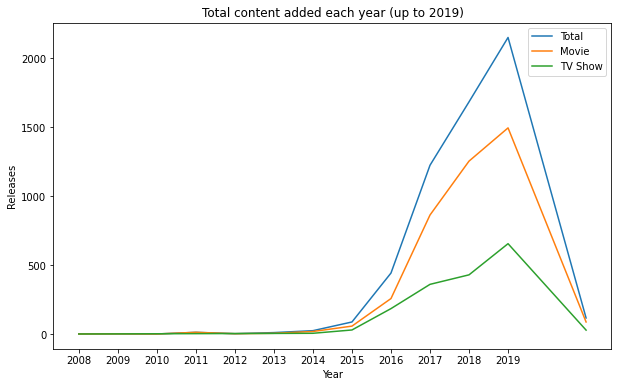

In [61]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=netflix_year, x='year', y='count')
sns.lineplot(data=movie_year, x='year', y='count')
sns.lineplot(data=show_year, x='year', y='count')
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year (up to 2019)")
plt.legend(['Total','Movie','TV Show'])
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()